In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs       # ccrs contains information about projections
import cartopy                   # contains all other cartopy functions/classes/methods
import cartopy.feature as cfeature
import os

In [2]:
indir='/shared/marn5895/data/GrahamJosieProject/'
outdir='/shared/marn5895/data/GrahamJosieProject/yrly_outputs/'


In [3]:
for file in os.listdir(indir):
    if file.endswith('.nc'):
        year=int(file[9:13])
        data=xr.open_dataset(indir + file)
        
        x=data.mean(dim=('time'))
        x=x.drop('year')
        x=x.expand_dims(time=[year])
        data.close()
        x['dvdy']=x.v.diff(dim='latitude', label='upper')/37000
        x['dudx']=x.u.diff(dim='longitude', label='upper')/(37000*np.cos(x.latitude*(np.pi/180)))
        x['conv']=x.dvdy + x.dudx
        x['vort']=(x.v.diff(dim='longitude', label='upper')/(37000*np.cos(x.latitude*(np.pi/180))))-(x.u.diff(dim='latitude', label='upper')/37000)
        
        x.to_netcdf(outdir+'conv_'+str(year)+'.nc', mode='w')


In [27]:
x

<xarray.Dataset>
Dimensions:    (longitude: 1201, latitude: 481, time: 1, depth: 1)
Coordinates:
  * longitude  (longitude) float64 20.0 20.33 20.67 21.0 ... 419.3 419.7 420.0
  * latitude   (latitude) float64 80.0 79.67 79.33 79.0 ... -79.33 -79.67 -80.0
  * time       (time) int64 2012
  * depth      (depth) float32 15.0
Data variables:
    u          (time, depth, latitude, longitude) float64 nan nan ... nan nan
    v          (time, depth, latitude, longitude) float64 nan nan ... nan nan
    um         (time, depth, latitude, longitude) float64 nan nan ... nan nan
    vm         (time, depth, latitude, longitude) float64 nan nan ... nan nan
    dvdy       (time, depth, latitude, longitude) float64 nan nan ... nan nan
    dudx       (time, depth, latitude, longitude) float64 nan nan ... nan nan
    conv       (time, depth, latitude, longitude) float64 nan nan ... nan nan
    vort       (time, depth, latitude, longitude) float64 nan nan ... nan nan

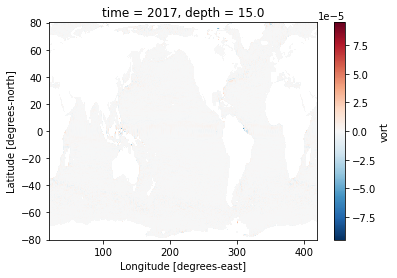

In [31]:
ds=xr.open_dataset(outdir+'conv_2017.nc')
